<a href="https://colab.research.google.com/github/sushil79g/Intrusion_detection/blob/master/IntrusionDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Dataset used:KDD 1999

In [1]:
!wget https://raw.githubusercontent.com/13o-bbr-bbq/machine_learning_security/master/Security_and_MachineLearning/dataset/kddcup.data_small.csv

--2019-11-20 08:51:23--  https://raw.githubusercontent.com/13o-bbr-bbq/machine_learning_security/master/Security_and_MachineLearning/dataset/kddcup.data_small.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16322 (16K) [text/plain]
Saving to: ‘kddcup.data_small.csv’

kddcup.data_small.c 100%[===================>]  15.94K  --.-KB/s    in 0.009s  

2019-11-20 08:51:23 (1.64 MB/s) - ‘kddcup.data_small.csv’ saved [16322/16322]



In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#matplotlib inline

In [0]:
file = pd.read_csv("kddcup.data_small.csv")

In [4]:
file.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


In [5]:
file.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

Details of column can be viewed @ http://kdd.ics.uci.edu/databases/kddcup99/task.html AND https://raw.githubusercontent.com/13o-bbr-bbq/machine_learning_security/master/Security_and_MachineLearning/dataset/kddcup.data_small.csv

In [7]:
!wget https://raw.githubusercontent.com/13o-bbr-bbq/machine_learning_security/master/Security_and_MachineLearning/dataset/kddcup_train.csv

--2019-11-20 08:52:21--  https://raw.githubusercontent.com/13o-bbr-bbq/machine_learning_security/master/Security_and_MachineLearning/dataset/kddcup_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11121139 (11M) [text/plain]
Saving to: ‘kddcup_train.csv’

kddcup_train.csv    100%[===================>]  10.61M  --.-KB/s    in 0.1s    

2019-11-20 08:52:22 (91.8 MB/s) - ‘kddcup_train.csv’ saved [11121139/11121139]



In [27]:
!wget https://raw.githubusercontent.com/13o-bbr-bbq/machine_learning_security/master/Security_and_MachineLearning/dataset/kddcup_test.csv

--2019-11-20 09:19:58--  https://raw.githubusercontent.com/13o-bbr-bbq/machine_learning_security/master/Security_and_MachineLearning/dataset/kddcup_test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7317403 (7.0M) [text/plain]
Saving to: ‘kddcup_test.csv’

kddcup_test.csv     100%[===================>]   6.98M  --.-KB/s    in 0.1s    

2019-11-20 09:19:59 (72.9 MB/s) - ‘kddcup_test.csv’ saved [7317403/7317403]



In [0]:
kdd_test = pd.read_csv('kddcup_test.csv')

In [0]:
kdd_train = pd.read_csv('kddcup_train.csv')

In [9]:
kdd_train.head(5)

,duration: continuous.,protocol_type: symbolic.,service: symbolic.,flag: symbolic.,src_bytes: continuous.,dst_bytes: continuous.,land: symbolic.,wrong_fragment: continuous.,urgent: continuous.,hot: continuous.,num_failed_logins: continuous.,logged_in: symbolic.,num_compromised: continuous.,root_shell: continuous.,su_attempted: continuous.,num_root: continuous.,num_file_creations: continuous.,num_shells: continuous.,num_access_files: continuous.,num_outbound_cmds: continuous.,is_host_login: symbolic.,is_guest_login: symbolic.,count: continuous.,srv_count: continuous.,serror_rate: continuous.,srv_serror_rate: continuous.,rerror_rate: continuous.,srv_rerror_rate: continuous.,same_srv_rate: continuous.,diff_srv_rate: continuous.,srv_diff_host_rate: continuous.,dst_host_count: continuous.,dst_host_srv_count: continuous.,dst_host_same_srv_rate: continuous.,dst_host_diff_srv_rate: continuous.,dst_host_same_src_port_rate: continuous.,dst_host_srv_diff_host_rate: continuous.,dst_host_serror_rate: continuous.,dst_host_srv_serror_rate: continuous.,dst_host_rerror_rate: continuous.,dst_host_srv_rerror_rate: continuous.,label
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


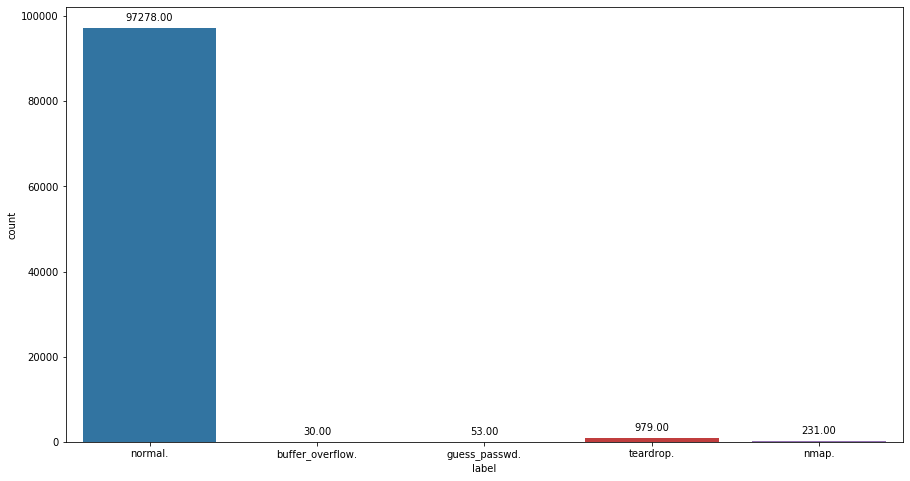

In [26]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(x="label", data=kdd_train,orient="v")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')